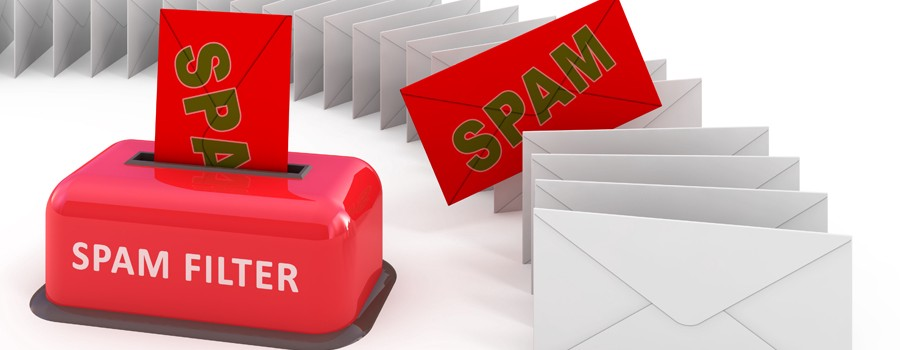

## Import the dataset with required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ed = pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
ed.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1339,ham,Every monday..nxt week vl be completing..,NaN,NaN,NaN
4994,ham,"Just looked it up and addie goes back Monday, ...",NaN,NaN,NaN
532,ham,Gudnite....tc...practice going on,NaN,NaN,NaN
1469,ham,7 wonders in My WORLD 7th You 6th Ur style 5th...,NaN,NaN,NaN
1164,ham,Well. Im computerless. Time to make some oreo ...,NaN,NaN,NaN


In [4]:
ed.shape

(5572, 5)

In [5]:
ed.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [6]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## 1st Step Data Cleaning

In [7]:
#Now drop the unuse column

ed.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
ed.sample(5)

,v1,v2
3195,ham,"I av a new number, . Wil u only use this one,ta."
4280,ham,"Wn u r hurt by d prsn who s close 2 u, do figh..."
4177,ham,Two teams waiting for some players
2136,ham,Well done and ! luv ya all
4272,ham,Kind of. Just missed train cos of asthma attac...


In [9]:
#Now rename the column name

ed.rename(columns={'v1' : 'Catagory','v2' : 'Email Body'},inplace=True)

In [10]:
ed.sample(5)

,Catagory,Email Body
3121,spam,Free entry in 2 a weekly comp for a chance to ...
5414,ham,East coast
3936,ham,"Yeah, in fact he just asked if we needed anyth..."
395,ham,From here after The performance award is calcu...
1960,spam,Guess what! Somebody you know secretly fancies...


In [11]:
#Now apply the LableEncoder method on ""Catagory"" column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
ed['Catagory'] = encoder.fit_transform(ed['Catagory'])

In [13]:
#Here in the Catagory column have two value 1st Ham and 2nd spam.
#So after apply the LabelEncoder method change the vaule from 0 or 1.
#Here Ham=0 and Spam=1

ed.sample(10)

,Catagory,Email Body
4426,0,So what did the bank say about the money?
84,0,Yup next stop.
4413,0,How stupid to say that i challenge god.You don...
2996,0,Don know..he is watching film in computer..
3309,0,Oh ho. Is this the first time u use these type...
4724,0,There'll be a minor shindig at my place later ...
3719,0,"Yeah why not, is the gang all ready"
3274,0,Hurry home u big butt. Hang up on your last ca...
4429,0,Yar lor... How u noe? U used dat route too?
4433,0,Sounds great! Im going to sleep now. Have a go...


In [14]:
#Now check duplicate values and removed.

ed.duplicated().sum()

403

In [15]:
ed = ed.drop_duplicates(keep='first')

In [16]:
ed.duplicated().sum()

0

In [17]:
ed.shape

(5169, 2)

## 2nd Step EDA

In [18]:
ed.sample(5)

,Catagory,Email Body
113,1,GENT! We are trying to contact you. Last weeke...
3218,0,Me too baby! I promise to treat you well! I be...
563,1,GENT! We are trying to contact you. Last weeke...
5542,0,Armand says get your ass over to epsilon
4472,0,S but not able to sleep.


In [19]:
ed['Catagory'].value_counts()

0    4516
1     653
Name: Catagory, dtype: int64

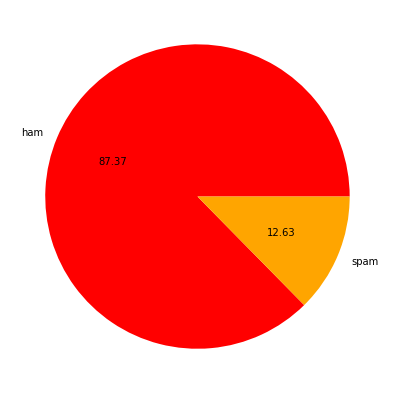

In [20]:
#Now create PieChart for better understanding
fig, ax = plt.subplots(figsize =(10, 7))
c= ['red','orange']
plt.pie(ed['Catagory'].value_counts(), labels=['ham','spam'], autopct="%0.2f",colors=c)
plt.show()

In [21]:
#Now we identifie the data is inbalanced, so we deep drive for EDA with NLTK liberaies.

!pip install nltk

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
#Now we have creat a 3-columns for help of email body.
#Let's see the lenth of email body.

ed['num_chr'] = ed['Email Body'].apply(len)

In [25]:
ed.sample(5)

,Catagory,Email Body,num_chr
4842,0,I need details about that online job.,37
4475,0,I'll pick you up at about 5.15pm to go to taun...,76
3614,0,I enjoy watching and playing football and bask...,81
2835,0,Nice.nice.how is it working?,28
1695,0,Finish already... Yar they keep saying i mushy...,72


In [26]:
#We calculate num. of words for each email body with help of NLTK.

ed['num_words'] = ed['Email Body'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words
3511,0,Already one guy loving you:-.,29,8
5507,0,I want to be inside you every night...,38,9
4306,0,I guess it is useless calling u 4 something im...,54,11
484,0,You should change your fb to jaykwon thuglyfe ...,55,9
3536,0,Mmmmm ... It was sooooo good to wake to your w...,153,37


In [28]:
#Apply the same rule for calculated sentences.

ed['num_sent'] = ed['Email Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent
1184,0,"Yo, you around? Just got my car back",36,10,2
3676,0,Great! So what attracts you to the brothas?,43,10,2
3682,0,When did i use soc... I use it only at home......,83,23,2
3977,0,Reason is if the team budget is available at l...,96,20,1
4543,0,when you and derek done with class?,35,8,1


In [30]:
ed[['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
#Now we describe the catagory based like Ham and spam.

#Ham
ed[ed['Catagory'] == 0][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
#Spam
ed[ed['Catagory'] == 1][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


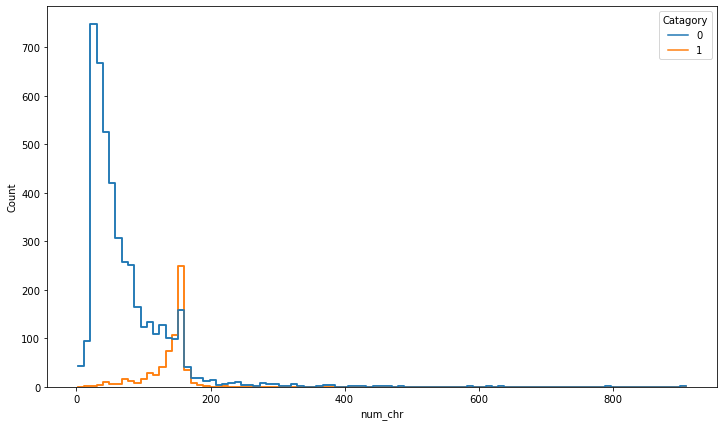

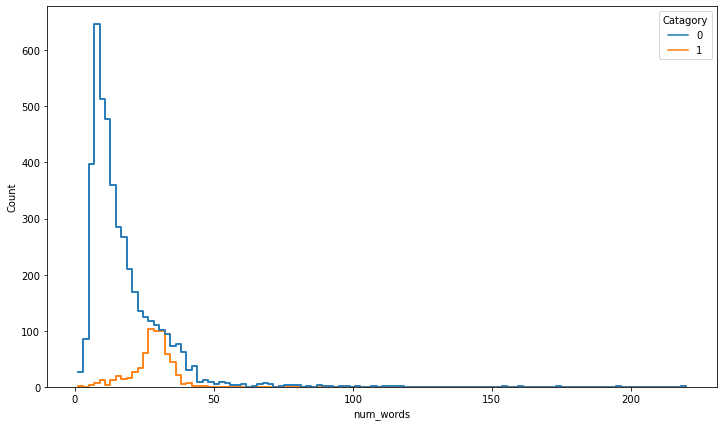

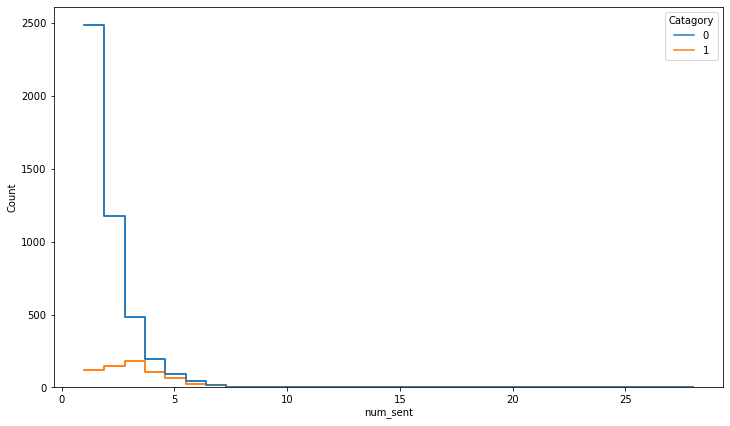

In [33]:
#Create Histogram.

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=False, element="step")
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=False, element="step")
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
plt.show()

<Figure size 1080x360 with 0 Axes>

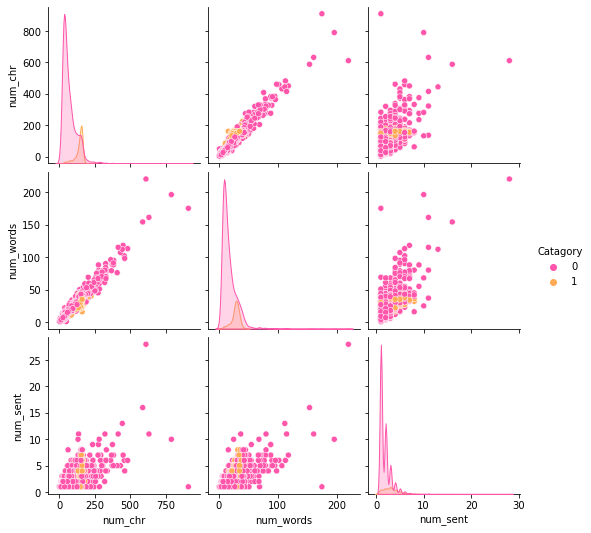

In [34]:
#Create PairPlot for define the relationship b/w columns.

plt.figure(figsize=(15,5))
sns.pairplot(ed,hue="Catagory",palette="spring")
plt.show()

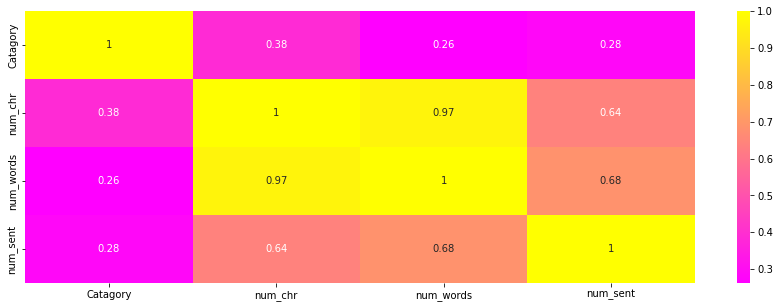

In [35]:
#Corelation heatmap

plt.figure(figsize=(15,5))
sns.heatmap(ed.corr(),annot=True,cmap="spring")
plt.show()

## 3rd Step Data Preprocessing

#### FlowChart:

#### 1.Lower Case >>>> 2.Tokenization >>> 3.Removing special charector >>> 4.Removing stop words and punctuations >>> 5.Stemming

In [36]:
def transform_text(text):
#Lowercase    
    text = text.lower()
    
#Tokenization    
    text = nltk.word_tokenize(text)
    
#RemoveSpecialChar    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
#StopWords & Stemming    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)      

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [41]:
transform_text('Host-based IDPS for linux systems.')

'idp linux system'

In [42]:
ed['Email Body'][1500]

'Host-based IDPS for linux systems.'

In [43]:
ed['Transform Text'] = ed['Email Body'].apply(transform_text)

In [44]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent,Transform Text
1049,1,18 days to Euro2004 kickoff! U will be kept in...,135,28,3,18 day euro2004 kickoff u kept inform latest n...
5158,0,I will come with karnan car. Please wait till ...,76,16,2,come karnan car pleas wait till 6pm directli g...
2689,0,"Ya ok, vikky vl c witin &lt;#&gt; mins and il...",56,20,1,ya ok vikki vl c witin lt gt min il repli u
2161,0,Is she replying. Has boye changed his phone nu...,50,10,2,repli boy chang phone number
3836,0,Early bird! Any purchases yet?,30,7,2,earli bird purchas yet


### Create WordCloud

In [74]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

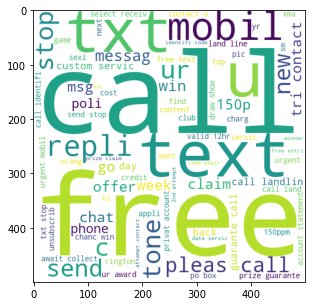

In [75]:
Spam_WC = wc.generate(ed[ed['Catagory'] == 1]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,5))
plt.imshow(Spam_WC)

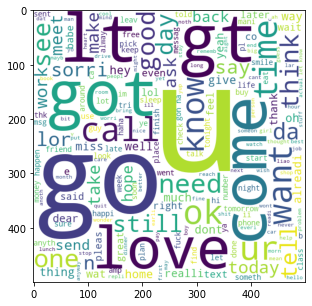

In [76]:
Ham_WC = wc.generate(ed[ed['Catagory'] == 0]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,5))
plt.imshow(Ham_WC)

### Top 20 words for Spam & Ham massages.

C:\Users\prita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


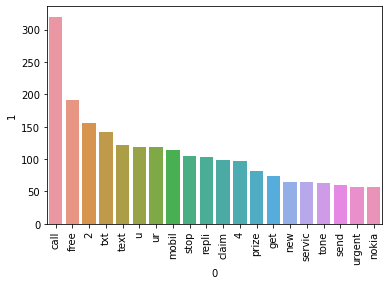

In [48]:
spam_corpus = []
for msg in ed[ed['Catagory'] == 1]['Transform Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

In [49]:
Ham_corpus = []
for msg in ed[ed['Catagory'] == 0]['Transform Text'].tolist():
    for word in msg.split():
        Ham_corpus.append(word)

In [50]:
len(Ham_corpus)

35394

C:\Users\prita\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


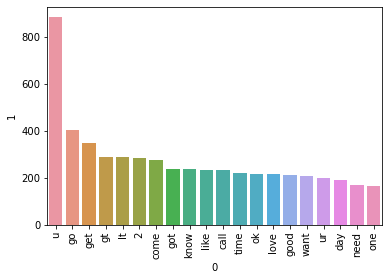

In [51]:
#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(Ham_corpus).most_common(20))[0],pd.DataFrame(Counter(Ham_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

## 4th Step Model Building

#### Text vectorization using Bag of words method

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [53]:
A = cv.fit_transform(ed['Transform Text']).toarray()

In [54]:
#5169=SMS & 6708=Words
A.shape

(5169, 6708)

In [55]:
B = ed['Catagory'].values

In [56]:
B

array([0, 0, 1, ..., 0, 0, 0])

#### Now train test split

In [57]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

#### Model from CountVectorizer

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [60]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [61]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [62]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


#### Model from TFIDVectorizer

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [64]:
A = tfidf.fit_transform(ed['Transform Text']).toarray()

In [65]:
#5169=SMS & 6708=Words
A.shape

(5169, 3000)

In [66]:
B = ed['Catagory'].values

In [67]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [71]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [72]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [73]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))